In [ ]:
#importing the required module
import numpy as np
import pandas as pd
import cv2
from google.colab.patches import cv2_imshow
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [ ]:
#loading the training and the testing data of mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

**MNIST dataset has 60000 training images and 10000 testing images, all image are of size (28,28) and all are black and white images.**

In [ ]:
print(X_train.shape, X_test.shape)

(60000, 28, 28) (10000, 28, 28)


In [ ]:
cv2_imshow(X_train[25])

In [ ]:
y_train[25]

2

In [ ]:
X_train[25]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  83,
         91, 143, 255, 190,  91,  50,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   9,  49, 180, 246,
        253, 253, 253, 253, 253, 220, 154,  17,   3,   0,   0,   0,   0,
          0,   0],
       [  

In [ ]:
#scaling all the images
X_train_scaled, X_test_scaled = X_train/255, X_test/255

In [ ]:
print(X_train_scaled[25])

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

**Making a Nueral Network**

In [ ]:
model = Sequential([
    Flatten(input_shape=(28,28)),
    Dense(100, activation = 'relu'),
    Dense(25, activation = 'relu'),
    Dense(10, activation = 'sigmoid')
])
model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.fit(X_train_scaled, y_train, epochs=12, validation_data = (X_test_scaled, y_test))

Epoch 1/12
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2685 - accuracy: 0.9229 - val_loss: 0.1548 - val_accuracy: 0.9538
Epoch 2/12
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1156 - accuracy: 0.9659 - val_loss: 0.1084 - val_accuracy: 0.9666
Epoch 3/12
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0822 - accuracy: 0.9749 - val_loss: 0.0966 - val_accuracy: 0.9715
Epoch 4/12
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0631 - accuracy: 0.9804 - val_loss: 0.0912 - val_accuracy: 0.9721
Epoch 5/12
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0495 - accuracy: 0.9846 - val_loss: 0.0781 - val_accuracy: 0.9748
Epoch 6/12
1875/1875 [==============================] - 8s 4ms/step - loss: 0.0416 - accuracy: 0.9864 - val_loss: 0.0923 - val_accuracy: 0.9737
Epoch 7/12
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0344 - accuracy: 0.9889 - val_loss: 0.0780 - val_accuracy:

In [ ]:
cv2_imshow(X_test[547])

In [ ]:
y_test[547]

2

In [ ]:
pred_547 = model.predict(X_test_scaled)[547]
print(pred_547)
print('Prediction :',np.argmax(pred_547))

313/313 [==============================] - 1s 2ms/step
[1.5479300e-02 9.9594450e-01 1.0000000e+00 9.2839944e-01 1.1011994e-10
 3.4406937e-06 9.3687977e-06 1.8428144e-01 9.9999726e-01 5.0632982e-09]
Prediction : 2


In [ ]:
#testing the model with random images
img = cv2.imread('MNIST_digit.png')

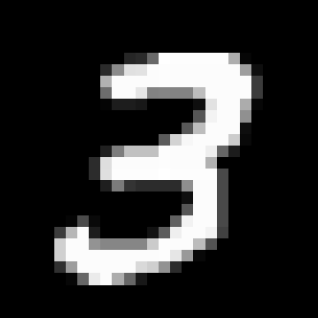

In [ ]:
cv2_imshow(img)

In [ ]:
img.shape

(318, 318, 3)

In [ ]:
img = cv2.cvtColor(img,cv2.COLOR_RGB2GRAY)

In [ ]:
img.shape

(318, 318)

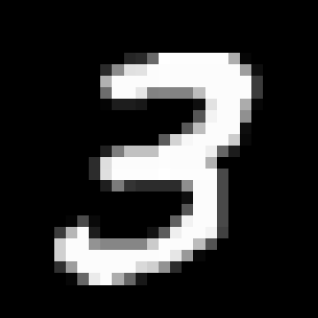

In [ ]:
cv2_imshow(img)

In [ ]:
img = cv2.resize(img,(28,28))

In [ ]:
cv2_imshow(img)

In [ ]:
img = img/255

In [ ]:
img.shape

(28, 28)

In [ ]:
img = np.reshape(img,[1,28,28])

In [ ]:
p = model.predict(img)

1/1 [==============================] - 0s 20ms/step


In [ ]:
np.argmax(p)

3

In [ ]:
#importing OPENCV module
import cv2

In [ ]:
input1=cv2.imread('20231104_160820.jpg')

In [ ]:
input1.shape

(329, 296, 3)

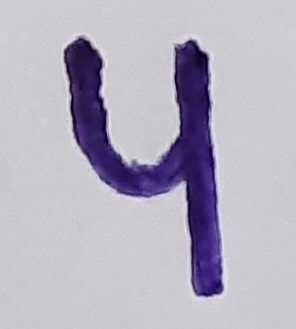

In [ ]:
cv2_imshow(input1)

In [ ]:
input1 = cv2.threshold(input1, 127, 255, cv2.THRESH_BINARY_INV)[1]

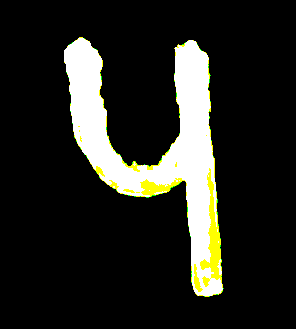

In [ ]:
cv2_imshow(input1)

In [ ]:
input1 = cv2.cvtColor(input1,cv2.COLOR_RGB2GRAY)

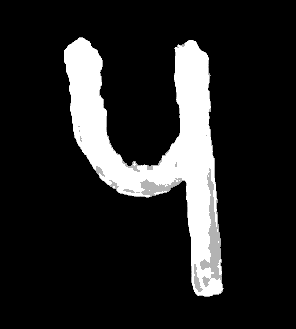

In [ ]:
cv2_imshow(input1)

In [ ]:
input1_resize = cv2.resize(input1,(28,28))

In [ ]:
cv2_imshow(input1_resize)

In [ ]:
input1_resize = input1_resize/255

In [ ]:
input1_resize.shape

(28, 28)

In [ ]:
input1_ = np.reshape(input1_resize,[1,28,28])

In [ ]:
prediction = model.predict(input1_)

1/1 [==============================] - 0s 19ms/step


In [ ]:
np.argmax(prediction)

4

**Defining function for predicting image number only using image url**

In [ ]:
def num_classifier(image_url):
  #reading the image through image_url using OPENCV
  image = cv2.imread(image_url)
  #apply threshold binary inv to the image
  image = cv2.threshold(image, 127, 255, cv2.THRESH_BINARY_INV)[1]
  #now converting image from RGB to Gray
  image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
  #resizing the image to (28,28)
  image = cv2.resize(image,(28,28))
  cv2_imshow(image)
  #scaling the image
  image = image/255
  #reshaping the image
  image = np.reshape(image,[1,28,28])
  #using our model for prediction
  prediction = model.predict(image)
  return np.argmax(prediction)

In [ ]:
#importing two images of number that I wrote
num = 'Rt.jpg'
num_ = '8hhs.jpg'

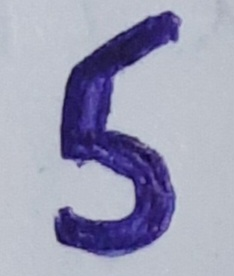

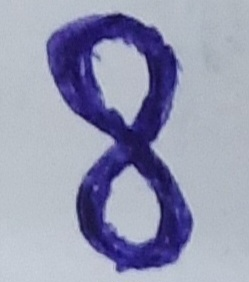

In [ ]:
#displaying both the images
img1=cv2.imread(num)
cv2_imshow(img1)
img2=cv2.imread(num_)
cv2_imshow(img2)

**Now using the function**

In [ ]:
num = 'Rt.jpg'
num_classifier(num)

1/1 [==============================] - 0s 29ms/step


5

In [ ]:
num_ = '8hhs.jpg'
num_classifier(num_)

1/1 [==============================] - 0s 21ms/step


8

In [ ]:
num_classifier('1.jpg')

1/1 [==============================] - 0s 20ms/step


1

**Exporting the model**

In [ ]:
import pickle

In [ ]:
pickle.dump(model,open('model_number.pkl','wb'))